In [1]:
import numpy as np
import pandas as pd
import copy, math

import re

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary_df = pd.read_csv('./data/nba_salaries21-22.csv')
stats_df = pd.read_csv('./data/player_stats.csv')
age_df = pd.read_csv('./data/nba_player_age21-22.csv')

In [3]:
stats_df['Name'] = stats_df.NAME.apply(lambda x: re.split(r'[A-Z]{2,4}', string = x)[0])
# stats_df = stats_df[['Name', 'PTS']]
stats_df.drop(labels = ['NAME', 'RK'], inplace = True, axis = 1)
stats_df.head()

,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,FTA,FT%,REB,AST,ST,BLK,TO,DD2,TD3,Name
0,C,68,33.8,30.6,9.8,19.6,49.9,1.4,3.7,37.1,...,11.8,81.4,11.7,4.2,1.1,1.5,3.1,46,2,Joel Embiid
1,SF,56,37.2,30.3,11.4,21.8,52.4,2.9,8.0,35.9,...,6.0,75.6,8.2,6.2,1.3,1.1,3.5,21,6,LeBron James
2,PF,67,32.9,29.9,10.3,18.6,55.3,1.1,3.6,29.3,...,11.4,72.2,11.6,5.8,1.1,1.4,3.3,46,4,Giannis Antetokounmpo
3,PF,55,37.2,29.9,10.5,20.3,51.8,2.1,5.5,38.3,...,7.4,91.0,7.4,6.4,0.9,0.9,3.5,18,4,Kevin Durant
4,PG,65,35.4,28.4,9.9,21.6,45.7,3.1,8.8,35.3,...,7.5,74.4,9.1,8.7,1.2,0.6,4.5,44,10,Luka Doncic


In [4]:
salary_df.columns = ['Rk', 'Name', 'Team', 'Salary']

salary_df['Position'] = salary_df.Name.apply(lambda x: x.split(',')[1])
salary_df['Name'] = salary_df.Name.apply(lambda x: x.split(',')[0])

salary_df = salary_df[['Name', 'Team', 'Salary', 'Position']]

salary_df.head()

,Name,Team,Salary,Position
0,Stephen Curry,Golden State Warriors,"$45,780,966",PG
1,James Harden,Philadelphia 76ers,"$44,310,840",SG
2,John Wall,LA Clippers,"$44,310,840",PG
3,Russell Westbrook,Los Angeles Lakers,"$44,211,146",PG
4,Kevin Durant,Brooklyn Nets,"$42,018,900",PF


In [5]:
age_df.head()

,Player,Pos,HT,WT,Age,Teams,GP,YOS,Pre-Draft Team,Draft Status,Nationality
0,Precious Achiuwa,SF,6-8,244,22,TOR,73,1,Memphis,2020 Rnd 1 Pick 20,Nigeria
1,Steven Adams,C,6-11,265,28,MEM,76,8,Pittsburgh,2013 Rnd 1 Pick 12,New Zealand
2,Bam Adebayo,C,6-10,255,24,MIA,56,4,Kentucky,2017 Rnd 1 Pick 14,United States
3,Santi Aldama,C,6-11,224,21,MEM,32,0,Loyola (MD),2021 Rnd 1 Pick 30,Spain
4,LaMarcus Aldridge,FC,6-11,265,36,BRK,47,15,Texas,2006 Rnd 1 Pick 2,United States


In [6]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Player          605 non-null    object
 1   Pos             605 non-null    object
 2   HT              605 non-null    object
 3   WT              605 non-null    int64 
 4   Age             605 non-null    int64 
 5   Teams           605 non-null    object
 6   GP              605 non-null    int64 
 7   YOS             605 non-null    int64 
 8   Pre-Draft Team  605 non-null    object
 9   Draft Status    605 non-null    object
 10  Nationality     605 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.1+ KB


In [7]:
# merge salary, stats, and age df
df = pd.merge(salary_df, stats_df, on = 'Name', how = 'inner')
df = pd.merge(df, age_df, left_on = 'Name', right_on = 'Player', how = 'inner')

# edit rows
df['Salary'] = df.Salary.str.replace('$', '', regex = False).str.replace(',', '', regex = False)
df['Salary'] = pd.to_numeric(df.Salary)
df.Salary = df.Salary / 1000000
df['Starter'] = df.MIN > 25
df.head()

,Name,Team,Salary,Position,POS,GP_x,MIN,PTS,FGM,FGA,...,HT,WT,Age,Teams,GP_y,YOS,Pre-Draft Team,Draft Status,Nationality,Starter
0,Stephen Curry,Golden State Warriors,45.780966,PG,PG,64,34.5,25.5,8.4,19.1,...,6-3,198,33,GSW,64,12,Davidson,2009 Rnd 1 Pick 7,United States,True
1,James Harden,Philadelphia 76ers,44.310840,SG,SG,65,37.2,22.0,6.3,15.3,...,6-5,220,32,"BRK, PHL",65,12,Arizona State,2009 Rnd 1 Pick 3,United States,True
2,Russell Westbrook,Los Angeles Lakers,44.211146,PG,PG,78,34.3,18.5,7.0,15.8,...,6-3,200,33,LAL,78,13,UCLA,2008 Rnd 1 Pick 4,United States,True
3,Kevin Durant,Brooklyn Nets,42.018900,PF,PF,55,37.2,29.9,10.5,20.3,...,6-10,225,33,BRK,55,14,Texas,2007 Rnd 1 Pick 2,United States,True
4,LeBron James,Los Angeles Lakers,41.180544,SF,SF,56,37.2,30.3,11.4,21.8,...,6-8,250,37,LAL,56,18,St. Vincent St. Mary High School (Ohio),2003 Rnd 1 Pick 1,United States,True


In [8]:
def draft_pos(x):
    rnd = 0
    pick = 0
    
    pos = x.split(' ')
    if (pos[-1] == 'Undrafted'):
        # arbitrary number for undrafted players
        return 61
    else:
        rnd = int(pos[2])
        pick = int(pos[-1])
        
    if (rnd == 1):
        pos = pick
    else:
        pos = pick + 30
        
    return pos

In [9]:
df['DraftPosition'] = df['Draft Status'].apply(lambda x: draft_pos(x))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 415
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            416 non-null    object 
 1   Team            416 non-null    object 
 2   Salary          416 non-null    float64
 3   Position        416 non-null    object 
 4   POS             416 non-null    object 
 5   GP_x            416 non-null    int64  
 6   MIN             416 non-null    float64
 7   PTS             416 non-null    float64
 8   FGM             416 non-null    float64
 9   FGA             416 non-null    float64
 10  FG%             416 non-null    float64
 11  3PM             416 non-null    float64
 12  3PA             416 non-null    float64
 13  3P%             416 non-null    float64
 14  FTM             416 non-null    float64
 15  FTA             416 non-null    float64
 16  FT%             416 non-null    float64
 17  REB             416 non-null    flo

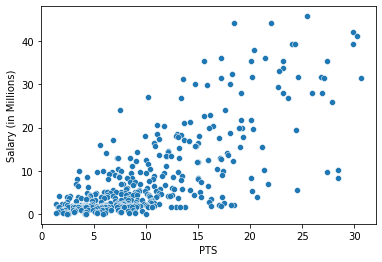

In [11]:
plt.figure()

ax = sns.scatterplot(x = 'PTS', y = 'Salary', data = df)
ax.set_ylabel('Salary (in Millions)')

plt.show()

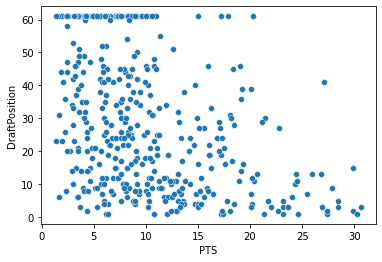

In [12]:
plt.figure()
ax = sns.scatterplot(x = 'PTS', y = 'DraftPosition', data = df)

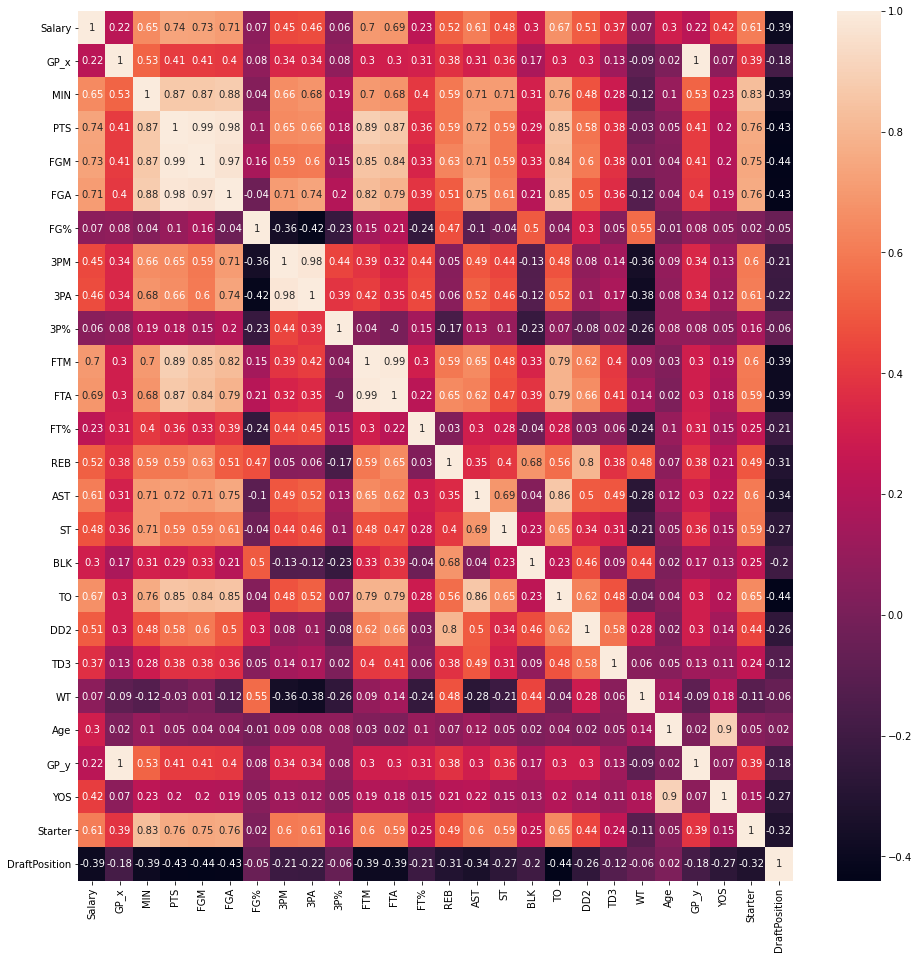

In [13]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr().round(2), annot = True)
plt.show()

In [14]:
np.unique(df.Position)

array([' C', ' F', ' G', ' PF', ' PG', ' SF', ' SG'], dtype=object)

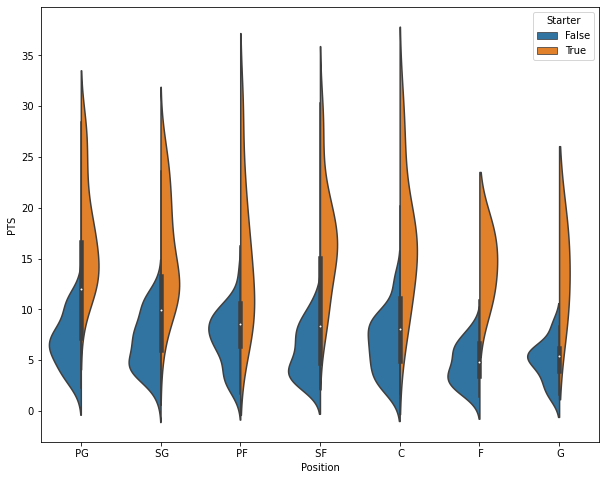

In [15]:
plt.figure(figsize = (10,8))

sns.violinplot(data = df, x = 'Position', y = 'PTS', hue = 'Starter', split = True, inner = 'box')

plt.show()

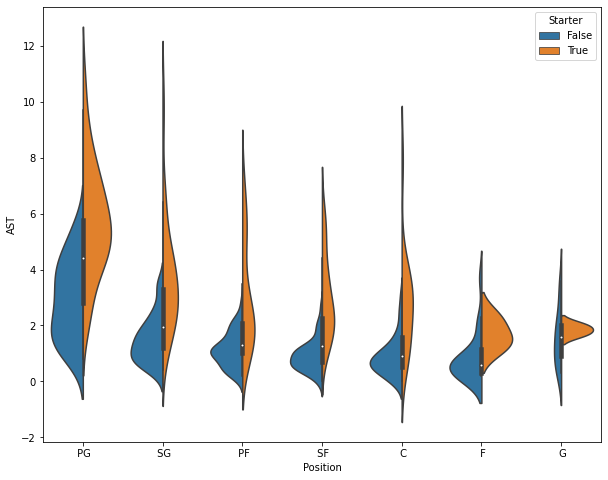

In [16]:
plt.figure(figsize = (10,8))

sns.violinplot(data = df, x = 'Position', y = 'AST', hue = 'Starter', split = True)
plt.show()

In [17]:
df.groupby('Position').aggregate({'PTS': np.average, 'AST': np.average, 'REB': np.average})

,PTS,AST,REB
Position,,,
C,9.193846,1.360000,6.067692
F,5.890909,0.963636,3.609091
G,5.740000,1.595000,1.800000
PF,9.581159,1.749275,4.971014
PG,12.731429,4.477143,3.361429
SF,10.232432,1.754054,3.701351
SG,10.628125,2.455208,3.156250


## Linear Model

In [18]:
def compute_cost(x, y, w, b):
    """
    args: 
    x -> feature vector
    y -> target vector
    w,b -> parameters of f_wb
    """
    
    m = x.shape[0]
    total_cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        total_cost += cost
        
    return total_cost / (2 * m)
    

In [19]:
def compute_gradient(x, y, w, b, alpha):
    """
    args:
    x -> feature vector
    y -> target vector
    w,b -> parameters of f_wb
    alpha -> learning rate
    """
    
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        
        dj_dw += dj_dw_i
        dj_db += dj_db_i
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
        
    tmp_w = w - alpha * dj_dw
    tmp_b = b - alpha * dj_db
    
    return tmp_w, tmp_b

In [20]:
def gradient_descent(x, y, w_in, b_in, alpha, iterations):
    """
    args:
    w_in, b_in -> scalar parameters
    x,y -> feature and target vectors
    alpha -> scalar learning rate
    iterations -> number of steps to take in gradient descent algorithm
    """
    
    w, b = w_in, b_in
    
    for i in range(iterations):
        w, b = compute_gradient(x, y, w, b, alpha)
        cost = compute_cost(x, y, w, b)
        
        if (i % 100 == 0):
            print(f'w: {w}, b: {b}, cost: {cost}')
            
    return w,b

In [21]:
# setting parameters for model
x_train = np.array(df.Salary).reshape(-1,1)
y_train = np.array(df.PTS).reshape(-1,1)


alpha = .01
w, b = 10, 5

iterations = 1000

In [22]:
w_final, b_final = gradient_descent(x_train, y_train, w, b, alpha, iterations)

w: [-5.29941542], b: [4.2343843], cost: [2797.59479293]
w: [0.52285298], b: [5.24190977], cost: [9.14810517]
w: [0.50286154], b: [5.63652889], cost: [8.98797435]
w: [0.4917619], b: [5.85562902], cost: [8.93861108]
w: [0.48559917], b: [5.97727763], cost: [8.92339394]
w: [0.4821775], b: [6.04481928], cost: [8.91870298]
w: [0.48027773], b: [6.08231971], cost: [8.91725691]
w: [0.47922294], b: [6.10314067], cost: [8.91681113]
w: [0.4786373], b: [6.11470086], cost: [8.91667371]
w: [0.47831214], b: [6.12111931], cost: [8.91663134]


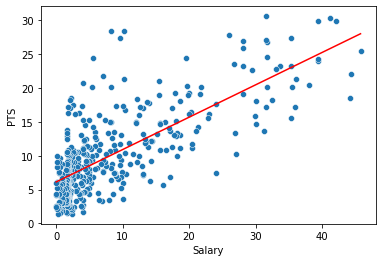

In [23]:
plt.figure()
f_wb = w_final * x_train + b_final
sns.scatterplot(data = df, x = 'Salary', y = 'PTS')
plt.plot(x_train, f_wb, color = 'red')

plt.show()

## Multiple Linear Regression

In [31]:
def compute_ml_cost(x, y, w, b):
    """
    args:
        x: vector of feature variables
        y: vector of feature variables
        w: vector of scalars
        b: scalar parameter
        
    output:
        total cost associated with model parameters w,b
    """
    
    m = x.shape[0]
    total_cost = 0
    
    for i in range(m):
        f_wb = np.dot(w,x[i]) + b
        error = (f_wb - y[i]) ** 2
        total_cost += error
        
    total_cost = total_cost / (2 * m)
    
    return total_cost

In [32]:
def compute_ml_gradient(x, y, w, b):
    """
    args:
        x: vector of feature variables
        y: vector of feature variables
        w: vector of scalars
        b: scalar parameter
    """
    
    m,n = x.shape
    
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        
        for j in range(n):
            dj_dw[j] = dj_dw[j] + ((f_wb - y[i]) * x[i, j])
            
        dj_db += f_wb - y[i]
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [35]:
def gradient_descent_ml(x, y, w_in, b_in, alpha, iterations):
    """
    args:
        x: 2d vector of feature variables
        y: vector of target variable
        w_in: parameter vector
        b_in: scalar parameter
        alpha: scalar learning rate
        iterations: num of iterations for gd alg
        
    output:
        w,b: parameters for model
        cost: total cost for w,b
    """
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(iterations):
        dj_dw, dj_db = compute_ml_gradient(x, y, w, b)
            
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost J at each iteration
        if (i<100000):      # prevent resource exhaustion 
            J_history.append( compute_ml_cost(x, y, w, b))        
        
        if (i% math.ceil(iterations / 10) == 0):
            print(f"Iteration {i}: Cost {J_history[-1]}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [37]:
predictors = ['DraftPosition', 'Salary']
x_train = np.array(df[predictors])
y_train = np.array(df['PTS']).reshape(-1,1)

w_in = np.array([1,1])
b_in = 1

iterations = 10000
alpha = .001

w_out, b_out, hist = gradient_descent_ml(x_train, y_train, w_in, b_in, alpha, iterations)

Iteration 0: Cost [64.97981107]   
Iteration 1000: Cost [11.64499337]   
Iteration 2000: Cost [10.61915553]   
Iteration 3000: Cost [9.91967368]   
Iteration 4000: Cost [9.44272221]   
Iteration 5000: Cost [9.1175062]   
Iteration 6000: Cost [8.89575311]   
Iteration 7000: Cost [8.74454768]   
Iteration 8000: Cost [8.64144614]   
Iteration 9000: Cost [8.57114492]   


In [38]:
# predicting stephen curry's 2023 stats
def predict(w, x, b):
    f_wb = np.dot(w, x) + b
    
    return f_wb

In [40]:
steph = np.array([7, 48.07])

predict(w_out, x, b_out)

array([29.2386271])

In [41]:
lebron = np.array([1, 44.47])

predict(w_out, lebron, b_out)

array([27.74992116])